### Rain in Australia


In [119]:
# imports
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import math
import datetime

In [120]:
# load data
path = Path('data', 'weatherAUS.csv')
df = pd.read_csv(path)
df.head()
n_columns = len(df.columns)
variables = df.columns[:-1]
target_var = df.columns[-1]


In [121]:
# in any case, we can drop all rows where the target variable (RainTomorrow) is NaN, for obvious reasons
assert(df[target_var].isna().sum() != 0)
df.dropna(subset=target_var, inplace=True)
assert(df[target_var].isna().sum() == 0)

# we consider rows with 4 or more nan values as too inaccurate, so we drop those immediately
df.dropna(thresh=n_columns-4, inplace=True)

df.Date = pd.to_datetime(df.Date).astype('int64')
df.Date = (df.Date - df.Date.mean()) / df.Date.std()


# also, wind directions are given in string format
def order_by_cardinal_dir(vals):
    directions = {'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3, 'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7, 'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11, 'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15}
    return vals.map(directions)

df['WindGustDirOrdered'] = order_by_cardinal_dir(df['WindGustDir'])
df['WindDir9amOrdered'] = order_by_cardinal_dir(df['WindDir9am'])
df['WindDir3pmOrdered'] = order_by_cardinal_dir(df['WindDir3pm'])

df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
count,1.233690e+05,123291.000000,123336.000000,122934.000000,80286.000000,73809.000000,119154.000000,123306.000000,123337.000000,122948.000000,122368.000000,122727.000000,122777.000000,84428.000000,82370.000000,123281.000000,122733.000000,119141.000000,119468.000000,122928.000000
mean,2.681619e-15,12.559861,23.506627,2.367006,5.464882,7.629967,40.403125,14.631518,19.238825,68.061798,51.245219,1017.548650,1015.164803,4.435116,4.504225,17.314647,21.932227,7.513148,7.205176,7.600530
std,1.000000e+00,6.289660,6.979762,8.550311,4.141539,3.780383,13.394602,8.637416,8.654958,18.915674,20.723357,7.073007,7.008024,2.882471,2.719438,6.389805,6.796426,4.459557,4.644279,4.455576
min,-2.131392e+00,-8.200000,2.600000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-3.100000,1.700000,0.000000,0.000000,0.000000
25%,-8.848280e-01,8.000000,18.100000,0.000000,2.600000,4.900000,31.000000,9.000000,13.000000,56.000000,36.000000,1012.900000,1010.400000,1.000000,2.000000,12.500000,16.800000,4.000000,3.000000,4.000000
50%,5.769623e-02,12.300000,22.900000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.900000,21.300000,8.000000,7.000000,8.000000
75%,8.634024e-01,17.100000,28.500000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,82.000000,65.000000,1022.300000,1019.900000,7.000000,7.000000,21.900000,26.600000,11.000000,11.000000,11.000000
max,1.695169e+00,33.900000,48.100000,371.000000,82.400000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,15.000000,15.000000,15.000000


In [122]:
# data inspection
print(df.isna().sum())
plt.figure(figsize= (20,20))
matrix = sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, center = 0)
matrix.axes.set_title('Correlation matrix', fontsize = 40)
matrix.tick_params(labelsize=15)
df.shape

Date                      0
Location                  0
MinTemp                  78
MaxTemp                  33
Rainfall                435
Evaporation           43083
Sunshine              49560
WindGustDir            4228
WindGustSpeed          4215
WindDir9am             3901
WindDir3pm              441
WindSpeed9am             63
WindSpeed3pm             32
Humidity9am             421
Humidity3pm            1001
Pressure9am             642
Pressure3pm             592
Cloud9am              38941
Cloud3pm              40999
Temp9am                  88
Temp3pm                 636
RainToday               435
RainTomorrow              0
WindGustDirOrdered     4228
WindDir9amOrdered      3901
WindDir3pmOrdered       441
dtype: int64


C:\Users\Luka\AppData\Local\Temp\ipykernel_2336\2451943648.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, center = 0)


In [ ]:
#df.dropna(inplace=True)
#sns.pairplot(df.sample(1000))
#plt.show()

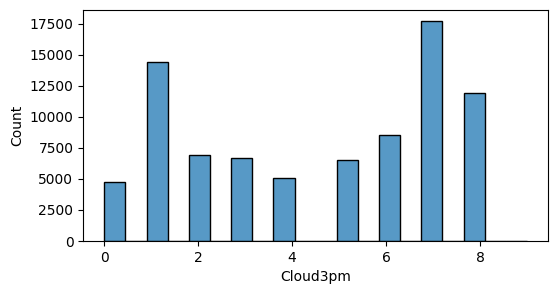

In [ ]:
#df = df.sample(n=1000)
for var in variables:
    if var != 'Cloud3pm': continue
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df[var], bins=20)
    plt.show()


In [ ]:
# next feature is sunshine: we just replace the nans with the median
_ = df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)

In [ ]:
# next feature is evaporation: we just replace the nans with the median
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)

In [ ]:
# Drop the rows with outliers in the Rainfall and Evaporation column
print(df.shape)
prev_len = df.shape[0]
#df = df[df['Rainfall'] < 250]
df = df.loc[(df['Rainfall'].notna()) & (df['Rainfall'] < 250)]

#assert (df.shape[0] < prev_len)
prev_len = df.shape[0]
print(df.shape)
df = df.loc[(df['Evaporation'] < 60)]
assert (df.shape[0] < prev_len)
df.shape

(123369, 26)
(122930, 26)


(122912, 26)

In [ ]:
# Replace NaN-values in WindGustDir by WindDir3pm, because those have the same data type and correlate somewhat highly (0.59, see correlation matrix)
df.WindGustDir.fillna(df.WindDir3pm, inplace=True)
df.WindDir3pm.fillna(df.WindGustDir, inplace=True)
df.WindDir9am.fillna(df.WindDir3pm, inplace=True)

In [ ]:
df.Cloud3pm.fillna(df.Cloud9am, inplace=True)
df.Cloud9am.fillna(df.Cloud3pm, inplace=True)
print(df.shape)
print(df.isna().sum())

(122912, 26)
Date                      0
Location                  0
MinTemp                  73
MaxTemp                  33
Rainfall                  0
Evaporation               0
Sunshine                  0
WindGustDir              76
WindGustSpeed          4207
WindDir9am               39
WindDir3pm               76
WindSpeed9am             63
WindSpeed3pm             32
Humidity9am             421
Humidity3pm            1001
Pressure9am             642
Pressure3pm             591
Cloud9am              35294
Cloud3pm              35294
Temp9am                  88
Temp3pm                 636
RainToday                 0
RainTomorrow              0
WindGustDirOrdered     4220
WindDir9amOrdered      3895
WindDir3pmOrdered       441
dtype: int64


In [ ]:
df.dropna(inplace=True)
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
count,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.000000,78828.00000
mean,-0.022593,13.011052,23.837818,2.502465,5.485600,7.722141,41.049703,15.726912,19.756723,67.099698,50.263130,1017.287825,1014.892168,4.402661,4.474907,17.722531,22.334329,7.361509,7.028353,7.50019
std,1.002447,6.475254,7.158906,8.992775,3.649358,3.287185,13.374355,8.322580,8.569854,19.026996,20.797122,6.977917,6.931561,2.873711,2.732888,6.607514,7.016431,4.415626,4.570344,4.42133
min,-2.131392,-6.900000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-1.000000,1.700000,0.000000,0.000000,0.00000
25%,-0.922833,8.100000,18.200000,0.000000,3.200000,6.400000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,12.600000,16.900000,4.000000,3.000000,4.00000
50%,0.028378,12.700000,23.400000,0.000000,4.800000,7.629967,39.000000,15.000000,19.000000,68.000000,51.000000,1017.200000,1014.800000,5.000000,5.000000,17.300000,21.900000,7.000000,7.000000,8.00000
75%,0.847115,17.900000,29.300000,0.800000,7.000000,10.200000,48.000000,20.000000,26.000000,81.000000,64.000000,1022.000000,1019.600000,7.000000,7.000000,22.700000,27.500000,11.000000,11.000000,11.00000
max,1.695169,31.400000,48.100000,247.200000,59.800000,14.500000,126.000000,69.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,9.000000,9.000000,39.400000,46.700000,15.000000,15.000000,15.00000


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDirOrdered,WindDir9amOrdered,WindDir3pmOrdered
0,-1.701393,Albury,13.4,22.9,0.6,4.8,7.629967,W,44.0,W,...,1007.1,8.0,8.0,16.9,21.8,No,No,12.0,12.0,13.0
2,-1.699221,Albury,12.9,25.7,0.0,4.8,7.629967,WSW,46.0,W,...,1008.7,2.0,2.0,21.0,23.2,No,No,11.0,12.0,11.0
4,-1.697049,Albury,17.5,32.3,1.0,4.8,7.629967,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,12.0,3.0,14.0
6,-1.694878,Albury,14.3,25.0,0.0,4.8,7.629967,W,50.0,SW,...,1008.2,1.0,1.0,18.1,24.6,No,No,12.0,10.0,12.0
11,-1.689448,Albury,15.9,21.7,2.2,4.8,7.629967,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,1.0,2.0,3.0


In [ ]:
card_dir_to_WE = {
    'N': 0, 'NNE': 0.382683, 'NE': 1 / math.sqrt(2), 'ENE': 0.923880, 'E': 1, 'ESE': 0.923880, 'SE': 1 / math.sqrt(2), 'SSE': 0.382683, 
    'S': 0, 'SSW': -0.382683, 'SW': -1 / math.sqrt(2), 'WSW': -0.923880, 'W': -1, 'WNW': -0.923880, 'NW': -1 / math.sqrt(2), 'NNW': -0.382683
}

card_dir_to_NS = {
    'W': 0, 'WNW': 0.382683, 'NW': 1 / math.sqrt(2), 'NNW': 0.923880, 'N': 1, 'NNE': 0.923880, 'NE': 1 / math.sqrt(2), 'ENE': 0.382683, 
    'E': 0, 'ESE': -0.382683, 'SE': -1 / math.sqrt(2), 'SSE': -0.923880, 'S': -1, 'SSW': -0.923880, 'SW': -1 / math.sqrt(2), 'WSW': -0.382683
}

# convert WindDir features to numerical
df['WindGustDir_x'] = df.WindGustDir.map(card_dir_to_WE)
df['WindGustDir_y'] = df.WindGustDir.map(card_dir_to_NS)

df['WindDir9am_x'] = df.WindDir9am.map(card_dir_to_WE)
df['WindDir9am_y'] = df.WindDir9am.map(card_dir_to_NS)

df['WindDir3pm_x'] = df.WindDir3pm.map(card_dir_to_WE)
df['WindDir3pm_y'] = df.WindDir3pm.map(card_dir_to_NS)

df.drop(labels=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'WindGustDirOrdered', 'WindDir9amOrdered', 'WindDir3pmOrdered'], axis=1, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
0,-1.701393,Albury,13.4,22.9,0.6,4.8,7.629967,44.0,20.0,24.0,...,16.9,21.8,No,No,-1.000000,0.000000,-1.000000,0.000000,-0.923880,0.382683
2,-1.699221,Albury,12.9,25.7,0.0,4.8,7.629967,46.0,19.0,26.0,...,21.0,23.2,No,No,-0.923880,-0.382683,-1.000000,0.000000,-0.923880,-0.382683
4,-1.697049,Albury,17.5,32.3,1.0,4.8,7.629967,41.0,7.0,20.0,...,17.8,29.7,No,No,-1.000000,0.000000,0.923880,0.382683,-0.707107,0.707107
6,-1.694878,Albury,14.3,25.0,0.0,4.8,7.629967,50.0,20.0,24.0,...,18.1,24.6,No,No,-1.000000,0.000000,-0.707107,-0.707107,-1.000000,0.000000
11,-1.689448,Albury,15.9,21.7,2.2,4.8,7.629967,31.0,15.0,13.0,...,15.9,17.0,Yes,Yes,0.382683,0.923880,0.707107,0.707107,0.923880,0.382683


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
0,-1.701393,Albury,13.4,22.9,0.6,4.8,7.629967,44.0,20.0,24.0,...,16.9,21.8,No,No,-1.000000,0.000000,-1.000000,0.000000,-0.923880,0.382683
2,-1.699221,Albury,12.9,25.7,0.0,4.8,7.629967,46.0,19.0,26.0,...,21.0,23.2,No,No,-0.923880,-0.382683,-1.000000,0.000000,-0.923880,-0.382683
4,-1.697049,Albury,17.5,32.3,1.0,4.8,7.629967,41.0,7.0,20.0,...,17.8,29.7,No,No,-1.000000,0.000000,0.923880,0.382683,-0.707107,0.707107
6,-1.694878,Albury,14.3,25.0,0.0,4.8,7.629967,50.0,20.0,24.0,...,18.1,24.6,No,No,-1.000000,0.000000,-0.707107,-0.707107,-1.000000,0.000000
11,-1.689448,Albury,15.9,21.7,2.2,4.8,7.629967,31.0,15.0,13.0,...,15.9,17.0,Yes,Yes,0.382683,0.923880,0.707107,0.707107,0.923880,0.382683


In [ ]:
# normalize every continuous feature
cont_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
df[cont_vars] = (df[cont_vars] - df[cont_vars].min()) / (df[cont_vars].max() - df[cont_vars].min())
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_x,WindGustDir_y,WindDir9am_x,WindDir9am_y,WindDir3pm_x,WindDir3pm_y
0,-1.701393,Albury,0.530026,0.427273,0.002427,0.080268,0.526205,0.299145,0.268657,0.297297,...,0.443069,0.446667,No,No,-1.000000,0.000000,-1.000000,0.000000,-0.923880,0.382683
2,-1.699221,Albury,0.516971,0.490909,0.000000,0.080268,0.526205,0.316239,0.253731,0.324324,...,0.544554,0.477778,No,No,-0.923880,-0.382683,-1.000000,0.000000,-0.923880,-0.382683
4,-1.697049,Albury,0.637076,0.640909,0.004045,0.080268,0.526205,0.273504,0.074627,0.243243,...,0.465347,0.622222,No,No,-1.000000,0.000000,0.923880,0.382683,-0.707107,0.707107
6,-1.694878,Albury,0.553525,0.475000,0.000000,0.080268,0.526205,0.350427,0.268657,0.297297,...,0.472772,0.508889,No,No,-1.000000,0.000000,-0.707107,-0.707107,-1.000000,0.000000
11,-1.689448,Albury,0.595300,0.400000,0.008900,0.080268,0.526205,0.188034,0.194030,0.148649,...,0.418317,0.340000,Yes,Yes,0.382683,0.923880,0.707107,0.707107,0.923880,0.382683


In [ ]:
df.shape

(78828, 26)